**Sobre o conjunto de dados**
Este conjunto de dados contém os seguintes recursos:

'Tempo diário gasto no site': tempo do consumidor no site em minutos

'Age': idade do cliente em anos

'Area Income': Avg. Renda da área geográfica do consumidor

'Uso Diário da Internet': Avg. minutos por dia o consumidor está na internet

'Ad Topic Line': Título do anúncio

'City': Cidade do consumidor

'Masculino': Se o consumidor era ou não do sexo masculino

'País': País do consumidor

'Timestamp': Hora em que consumidor clicou no anúncio ou fechou a janela

'Clicou no anúncio': 0 ou 1 indicou clicar no anúncio

# **Importando os dados:**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


**Vamos dividir a coluna de tempo para Data e Hora:**

In [51]:
lista_tempo = []
lista_data = []
lista_hora = []
for i in range(0, len(df["Timestamp"])):
  lista_data.append(df["Timestamp"][i].split(",")[0].split(" ")[0])
  lista_hora.append(df["Timestamp"][i].split(",")[0].split(" ")[1])
df["Date"] = lista_data
df["Hour"] = lista_hora
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2016-02-11,21:49:00
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2016-04-22,02:07:01
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2016-02-01,17:24:57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2016-03-24,02:35:54


**Vamos excluir a coluna "Timestamp"  e "Hour", "Ad Topic Line" e "Date", os tipos de dados não irão influenciar da predição final, porque nestas colunas só há 1 tipo de dados para cada registro.**

In [52]:
df.drop(columns=["Timestamp", "Hour", "Ad Topic Line","Date"], inplace=True)

In [53]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
City                         object
Male                          int64
Country                      object
Clicked on Ad                 int64
dtype: object

Percebe-se que não há dados nulos

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


**Rápida estatística.**

In [55]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Vamos dar uma olhada naa correlações entre as variáveis numéricas**

In [56]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


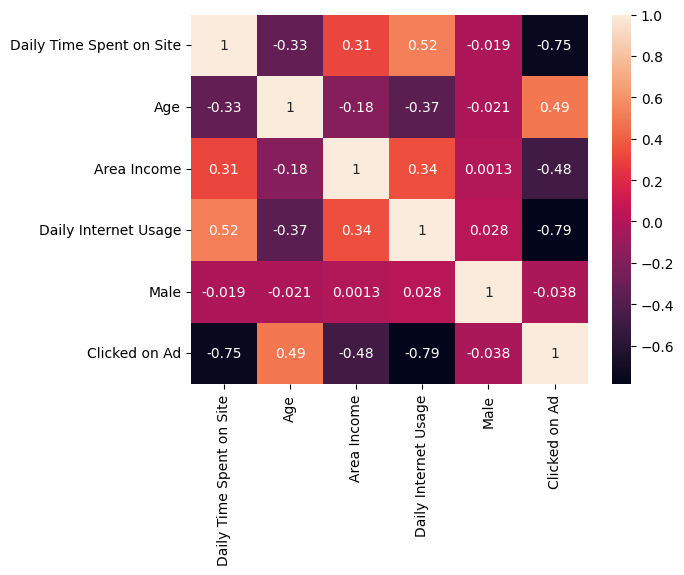

In [57]:
sns.heatmap(df.corr(), annot=True);

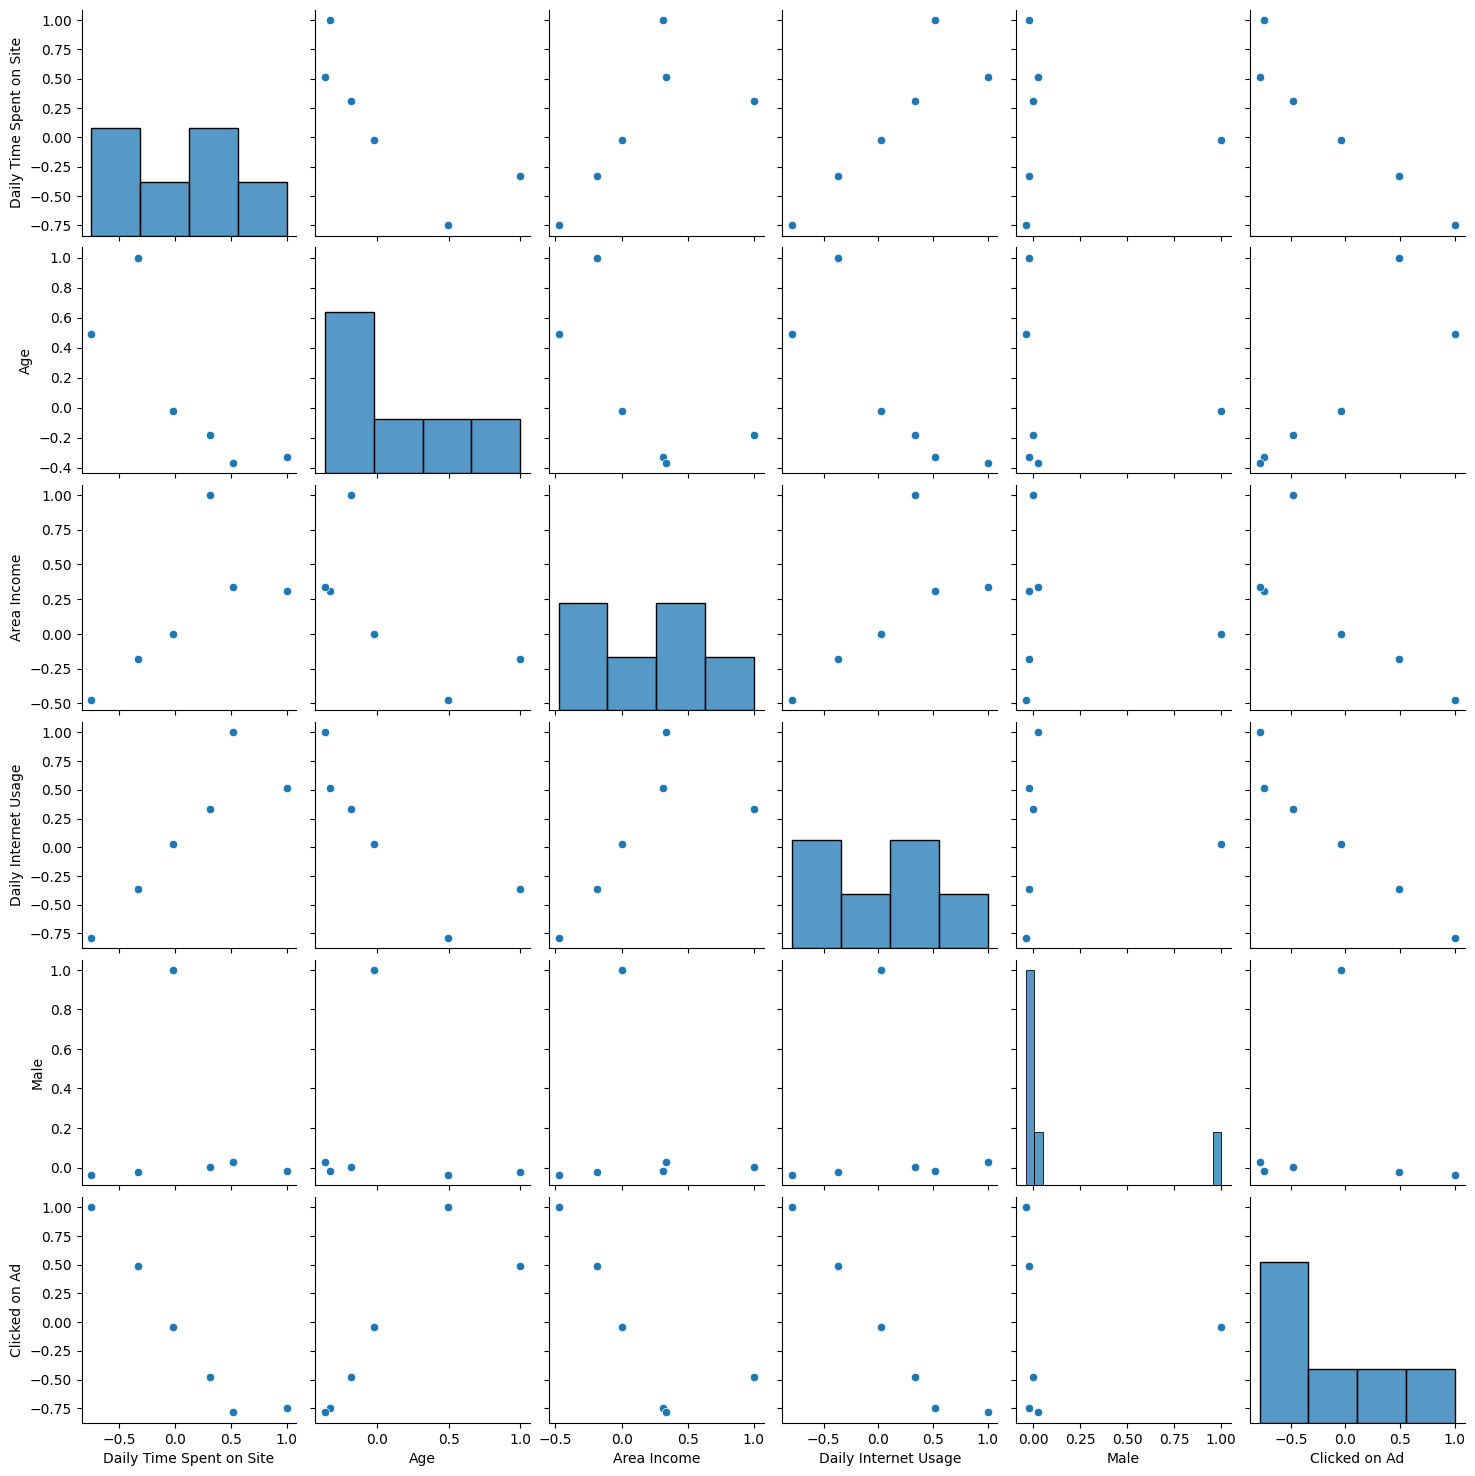

In [58]:
sns.pairplot(df.corr());

#**Tratamento dos dados.**

In [59]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [60]:
lista_oe = ["City", "Country"] 

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df[[i]])

  df[i]= oe.transform(df[[i]])

**Agora vamos escalonar todos os dados para ficarem com dimensões próximas.**

In [34]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad',
       'Date'],
      dtype='object')

In [61]:
ssc = StandardScaler()

ssc.fit(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Male', 'Country']])
h= ssc.transform(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Male', 'Country']])
df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Male', 'Country']] = h

**Vericando...todos os dados escalonados!!**

In [62]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,1.700304,-0.962695,1.424572,0
1,0.961132,-0.570425,1.002530,0.313805,1.492546,1.038750,0.451875,0
2,0.282083,-1.139826,0.356949,1.287589,-1.344415,-0.962695,0.981136,0
3,0.577432,-0.798185,-0.014456,1.501580,1.621499,1.038750,-0.177517,0
4,0.212664,-0.114905,1.408868,1.038731,1.141508,-0.962695,-0.277648,0
...,...,...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,-1.290685,1.038750,0.008440,1
996,-0.864601,1.023896,0.953329,-1.038735,0.006007,1.038750,-1.278953,1
997,-0.843775,1.707176,-0.938570,-1.358924,1.116434,1.038750,0.351744,1
998,-0.596389,-1.936986,-0.975484,0.181172,1.607171,-0.962695,-0.434996,0


#**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier()

**Fazendo a grade de parâmetros do KNN**

In [65]:
param_grid_knn = {"weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                 "n_neighbors" : range(2, 21)}

**Vamos jogar para 10 splits**

In [66]:
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

**Separando os dados de treino com os dados de teste.**

In [67]:
#Separando o que é features e target:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

**Motando a grade geral dos parâmetros com o GridSearch**

In [69]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [70]:
metrica1 = make_scorer(recall_score, pos_label=1)
metrica2 = make_scorer(precision_score, pos_label=0)

In [72]:
model_knn = GridSearchCV(estimator=knn,
                       param_grid=param_grid_knn ,
                       scoring={"recall": metrica1, "precision" : metrica2}, 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1,
                       refit="recall")

model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 152 candidates, totalling 1520 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             refit='recall',
             scoring={'precision': make_scorer(precision_score, pos_label=0),
                      'recall': make_scorer(recall_score, pos_label=1)},
             verbose=10)

In [73]:
model_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

**Ranking dos melhores parâmetros**

In [74]:
model_knn_results = pd.DataFrame(model_knn.cv_results_)
model_knn_results.sort_values(by=["rank_test_precision"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_recall,split1_test_recall,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
48,0.005402,0.002800,0.018532,0.007328,ball_tree,7,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",0.914286,0.914286,...,0.921053,1.0,0.947368,0.947368,0.947368,0.897436,0.921053,0.939597,0.028368,1
87,0.004541,0.000588,0.009596,0.001383,kd_tree,7,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'we...",0.914286,0.914286,...,0.921053,1.0,0.947368,0.947368,0.947368,0.897436,0.921053,0.939597,0.028368,1
86,0.004380,0.000278,0.012145,0.000478,kd_tree,7,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'we...",0.914286,0.914286,...,0.921053,1.0,0.947368,0.947368,0.947368,0.897436,0.921053,0.939597,0.028368,1
125,0.004769,0.003399,0.010222,0.003363,brute,7,distance,"{'algorithm': 'brute', 'n_neighbors': 7, 'weig...",0.914286,0.914286,...,0.921053,1.0,0.947368,0.947368,0.947368,0.897436,0.921053,0.939597,0.028368,1
11,0.003776,0.000145,0.008837,0.000345,auto,7,distance,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...",0.914286,0.914286,...,0.921053,1.0,0.947368,0.947368,0.947368,0.897436,0.921053,0.939597,0.028368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.004596,0.001972,0.014052,0.005237,auto,6,uniform,"{'algorithm': 'auto', 'n_neighbors': 6, 'weigh...",0.914286,0.885714,...,0.875000,1.0,0.923077,0.947368,0.947368,0.875000,0.897436,0.920479,0.036022,145
114,0.003373,0.000186,0.020740,0.021108,brute,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 2, 'weig...",0.857143,0.828571,...,0.833333,1.0,0.878049,0.923077,0.947368,0.875000,0.900000,0.900654,0.046410,149
76,0.004462,0.000943,0.011574,0.000762,kd_tree,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 2, 'we...",0.857143,0.828571,...,0.833333,1.0,0.878049,0.923077,0.947368,0.875000,0.900000,0.900654,0.046410,149
38,0.003879,0.000336,0.013924,0.007411,ball_tree,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",0.857143,0.828571,...,0.833333,1.0,0.878049,0.923077,0.947368,0.875000,0.900000,0.900654,0.046410,149


**As métricas de teste e treino saíram muito boas, vamos tentar melhorar no XGBoost**


Métricas de avaliação de treino:
[[354   2]
 [ 21 323]]


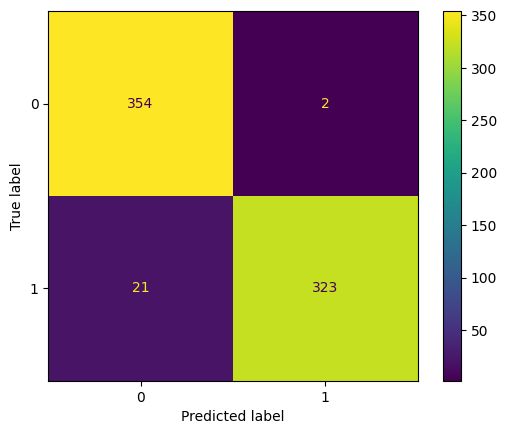

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       356
           1       0.99      0.94      0.97       344

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700


Métricas de avaliação de teste:
[[143   1]
 [ 14 142]]


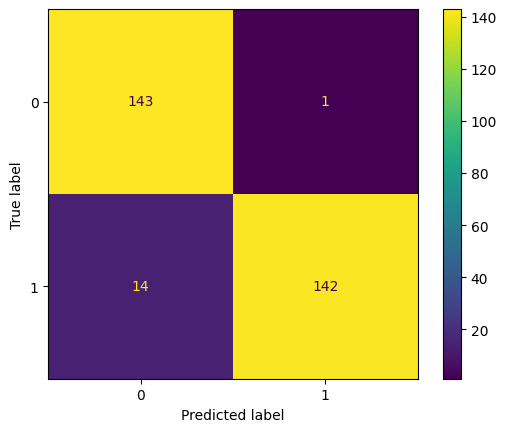

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       144
           1       0.99      0.91      0.95       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [75]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = model_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = model_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

Salvando o estimador...

In [85]:
import joblib

In [86]:
joblib.dump(model_knn, 'knn_modelo.pkl')

['knn_modelo.pkl']

In [ ]:
knn_modelo = joblib.load('knn_modelo.pkl')

**Probabilidade de sair cada diagnóstico:**

In [76]:
probas = model_knn.predict_proba(X_test)

**Probabilidade de sair cada resultado por registro**

In [81]:
probas

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.

In [77]:
tabela_knn = pd.DataFrame()

In [78]:
tabela_knn["Amostra existente"] = y_test

In [79]:
tabela_knn["Predição"] = y_pred_test

In [82]:
tabela_knn

,Amostra existente,Predição
945,0,0
452,0,0
304,1,1
433,0,0
864,0,0
...,...,...
679,1,1
140,0,0
321,0,0
613,0,0


Salvando a tabela

In [84]:
tabela_knn.to_csv("11-tabelaComparativa_knn.csv")

# **XGBOOST CLASSIFIER**

In [88]:
#Separando o que é features e target:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

In [89]:
xgbc = XGBClassifier(eval_metric='logloss', random_state=42)

**Vamos jogar para 10 splits**

In [90]:
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

**Fazendo a grade de parâmetros do XGBoost Regressor**

In [101]:
params_grid_xgbc = {"xgbc__n_estimators": [500, 1000, 2500],
                   "xgbc__max_depth": [1, 2, 5, 8, 10],
                   "xgbc__learning_rate": [0.001, 0.01]}

In [102]:
metrica1 = make_scorer(recall_score, pos_label=1)
metrica2 = make_scorer(precision_score, pos_label=0)

In [103]:
model_xgbc = GridSearchCV(estimator=xgbc,
                       param_grid=params_grid_xgbc ,
                       scoring={"recall": metrica1, "precision" : metrica2}, 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1,
                       refit="recall")

model_xgbc.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[19:50:40] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbc__learning_rate", "xgbc__max_depth", "xgbc__n_estimators" } are not used.



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importan...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'xgbc__learning_rate': [0.001, 0.01],
                         'xgbc__max_depth': [1, 2, 5, 8, 10],
                         'xgbc__n_estimators': [500, 1000, 2500]},
             refit='recall',
             scoring={'precision': make_scorer(precision_score, pos_label=0),
                      'recall': make_scorer(recall_score, pos_label=1)},
             verbose=10)

In [104]:
model_xgbc.best_params_

{'xgbc__learning_rate': 0.001, 'xgbc__max_depth': 1, 'xgbc__n_estimators': 500}


Métricas de avaliação de treino:
[[350   0]
 [  0 350]]


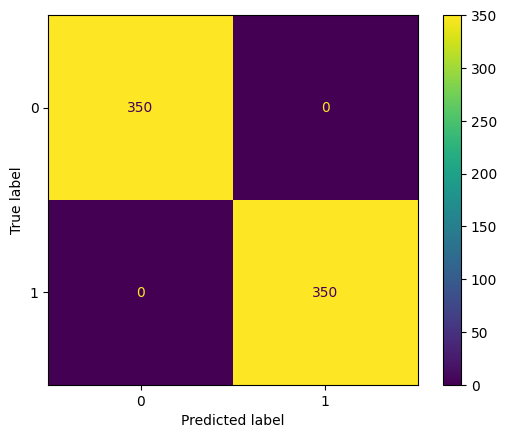

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


Métricas de avaliação de teste:
[[143   7]
 [  2 148]]


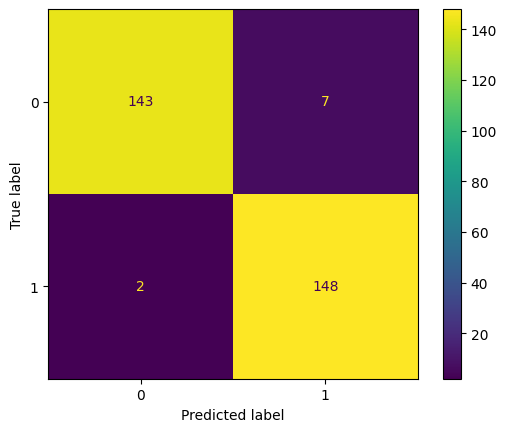

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.95      0.99      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [108]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = model_xgbc.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = model_xgbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

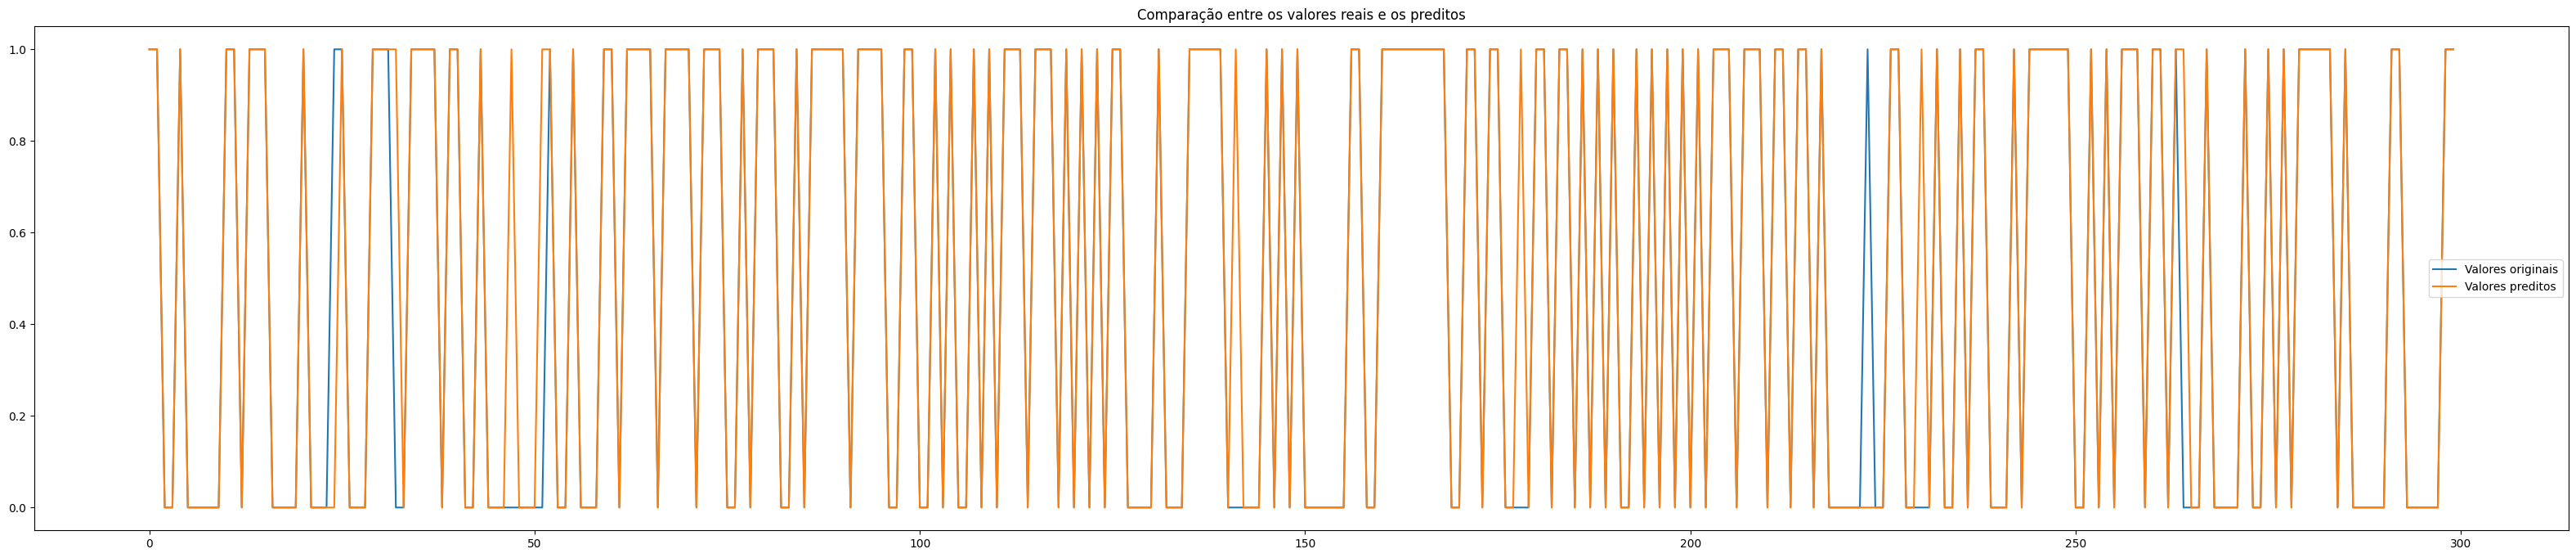

In [109]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Comparação entre os valores reais e os preditos")
plt.legend()
plt.show();

In [110]:
resultado_xgbr = df["Clicked on Ad"].unique()
print(f"{resultado_xgbr}")

[0 1]


**Probabilidade de sair cada diagnóstico:**

In [111]:
probas = model_xgbc.predict_proba(X_test)
probas

array([[9.01222229e-05, 9.99909878e-01],
       [1.24335289e-04, 9.99875665e-01],
       [9.97407317e-01, 2.59267678e-03],
       [9.99888420e-01, 1.11570713e-04],
       [3.25083733e-04, 9.99674916e-01],
       [9.90593374e-01, 9.40665137e-03],
       [9.99698162e-01, 3.01862485e-04],
       [9.98109758e-01, 1.89025467e-03],
       [9.99932468e-01, 6.75100528e-05],
       [9.99773622e-01, 2.26390548e-04],
       [3.48091125e-05, 9.99965191e-01],
       [1.27196312e-04, 9.99872804e-01],
       [9.96585071e-01, 3.41490237e-03],
       [2.00808048e-04, 9.99799192e-01],
       [6.38186932e-04, 9.99361813e-01],
       [8.27312469e-05, 9.99917269e-01],
       [9.99799669e-01, 2.00357041e-04],
       [9.86924887e-01, 1.30751096e-02],
       [8.84759903e-01, 1.15240090e-01],
       [9.98361945e-01, 1.63804728e-03],
       [2.15828419e-04, 9.99784172e-01],
       [9.99046445e-01, 9.53561685e-04],
       [9.99149084e-01, 8.50932440e-04],
       [9.99293029e-01, 7.06998922e-04],
       [8.155051

In [112]:
tabela_publicidade_xgbc = pd.DataFrame()

In [113]:
tabela_publicidade_xgbc["Amostra existente"] = y_test

In [114]:
tabela_publicidade_xgbc["Predição"] = y_pred_test

In [115]:
tabela_publicidade_xgbc

,Amostra existente,Predição
186,1,1
809,1,1
47,0,0
306,0,0
663,1,1
...,...,...
293,0,0
878,0,0
797,0,0
76,1,1


Salvando a tabela

In [116]:
tabela_publicidade_xgbc.to_csv("11-tabelaComparação_xgbc.csv")

**Salvando o estimador...**

In [ ]:
import joblib

In [159]:
joblib.dump(model_xgbc, 'xgbc_modelo.pkl')

['xgbc_modelo_ob.pkl']

In [ ]:
model_xgbc = joblib.load('xgbc_modelo.pkl')

# **Otimização Bayesiana**



---



---



---



In [119]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_breast_cancer(drop_not_features=["Clicked on Ad"], col_target="Clicked on Ad",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train_ob, X_test_ob, y_train_ob, y_test_ob = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train_ob.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train_ob.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador

In [120]:
X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador = pipe_pre_breast_cancer(drop_not_features=["Clicked on Ad"], 
                                                                            col_target="Clicked on Ad",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [121]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [122]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.0001, 0.00001]),
             "n_estimators" : hp.choice("n_estimators", range(1, 5000)),
             "max_depth" : hp.choice("max_depth", range(1, 11)),
             "colsample_bytree": hp.choice("colsample_bytree", [0.2, 0.9]),
             "subsample": hp.choice("subsample", [0.2, 0.9])}

In [123]:
from sklearn.model_selection import cross_validate

In [124]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBClassifier(**hps_space))])

    # =============================================

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train_ob, y_train_ob, 
                             cv=splitter,
                             scoring="accuracy",
                             n_jobs=-1)

    mean_f1 = results["test_score"].mean()

    # como o valor vai ser minimizado, mas queremos MAXIMIZAR o f1, colocamos esse sinal negativo
    return mean_f1

In [125]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [00:52<00:00,  5.26s/trial, best loss: 0.9366666666666668]


In [126]:
# pré-resposta da otimização
best_hps

{'colsample_bytree': 0,
 'learning_rate': 2,
 'max_depth': 0,
 'n_estimators': 3313,
 'subsample': 1}

In [127]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'colsample_bytree': 0.2,
 'learning_rate': 1e-05,
 'max_depth': 1,
 'n_estimators': 3314,
 'subsample': 0.9}

In [128]:
XGBClassifier(**best_hps)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1e-05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3314, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBClassifier(**best_hps))])

pipe.fit(X_train_ob, y_train_ob)



Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage',
                                                   'City', 'Male', 'Country']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalE...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=1e-05, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=1,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=3314, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])


Métricas de avaliação de treino:
[[431  19]
 [ 36 414]]


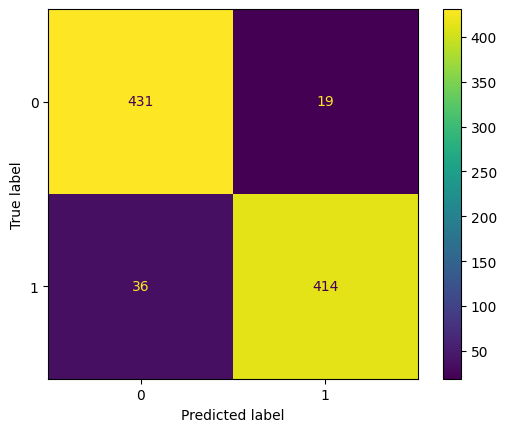

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       450
           1       0.96      0.92      0.94       450

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Métricas de avaliação de teste:
[[48  2]
 [ 6 44]]


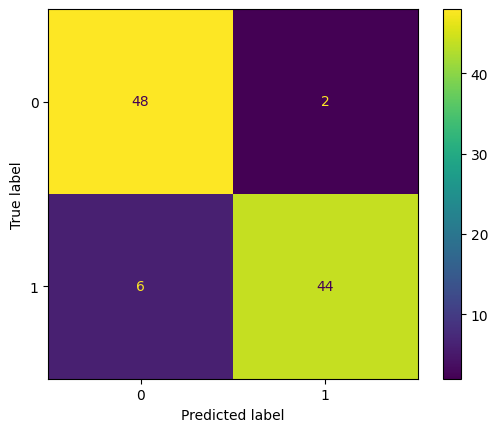

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        50
           1       0.96      0.88      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [132]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_ob = pipe.predict(X_train_ob)

print(confusion_matrix(y_train_ob, y_pred_train_ob))

ConfusionMatrixDisplay.from_predictions(y_train_ob, y_pred_train_ob)
plt.show()

print(classification_report(y_train_ob, y_pred_train_ob))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_ob = pipe.predict(X_test_ob)

print(confusion_matrix(y_test_ob, y_pred_test_ob))

ConfusionMatrixDisplay.from_predictions(y_test_ob, y_pred_test_ob)
plt.show()

print(classification_report(y_test_ob, y_pred_test_ob))

In [143]:
probas_y_pred_test_ob = pipe.predict_proba(X_test_ob)

**Probabilidade de sair cada resultado**

In [144]:
probas_y_pred_test_ob

array([[0.49559194, 0.50440806],
       [0.5050186 , 0.49498138],
       [0.5049333 , 0.4950667 ],
       [0.50486165, 0.49513835],
       [0.50510514, 0.4948949 ],
       [0.50491226, 0.4950877 ],
       [0.4955473 , 0.5044527 ],
       [0.4932992 , 0.5067008 ],
       [0.49716014, 0.50283986],
       [0.5032935 , 0.49670652],
       [0.49766833, 0.5023317 ],
       [0.5010598 , 0.49894023],
       [0.49915755, 0.50084245],
       [0.5050318 , 0.49496818],
       [0.49332058, 0.5066794 ],
       [0.4953264 , 0.5046736 ],
       [0.49329144, 0.50670856],
       [0.5050376 , 0.4949624 ],
       [0.504858  , 0.49514195],
       [0.49865115, 0.50134885],
       [0.5008795 , 0.49912047],
       [0.50526893, 0.49473104],
       [0.49543464, 0.50456536],
       [0.49307048, 0.5069295 ],
       [0.5023561 , 0.4976439 ],
       [0.50137746, 0.49862254],
       [0.5018305 , 0.49816948],
       [0.49311644, 0.50688356],
       [0.49779898, 0.502201  ],
       [0.5046449 , 0.4953551 ],
       [0.

In [153]:
tabela_xgbc_ob = pd.DataFrame()

In [154]:
y_test_ob.shape, y_pred_test_ob.shape

((100,), (100,))

In [152]:
len(y_pred_test_ob)

100

In [155]:
tabela_xgbc_ob["Amostra existente"] = y_test_ob

In [156]:
tabela_xgbc_ob["Predição"] = y_pred_test_ob

In [157]:
tabela_xgbc_ob

,Amostra existente,Predição
789,1,1
871,0,0
670,0,0
221,0,0
310,0,0
...,...,...
739,0,0
185,1,1
507,1,1
276,0,0


Salvando a tabela

In [158]:
tabela_publicidade_xgbc.to_csv("11-tabelaComparativa_ob.csv")

**Salvando o estimador...**

In [ ]:
import joblib

In [161]:
joblib.dump(model_xgbc, 'xgbc_modelo_ob.pkl')

['xgbc_modelo_ob.pkl']

In [ ]:
model_xgbc_ob = joblib.load('xgbc_modelo_ob.pkl')



---



---



---



#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

In [162]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,1.700304,-0.962695,1.424572,0
1,0.961132,-0.570425,1.002530,0.313805,1.492546,1.038750,0.451875,0
2,0.282083,-1.139826,0.356949,1.287589,-1.344415,-0.962695,0.981136,0
3,0.577432,-0.798185,-0.014456,1.501580,1.621499,1.038750,-0.177517,0
4,0.212664,-0.114905,1.408868,1.038731,1.141508,-0.962695,-0.277648,0


**Separar em features e target...**

In [163]:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

In [164]:
xgbc_shap = XGBClassifier().fit(X_train, y_train)

In [ ]:
!pip install shap
import shap

In [166]:
explainer = shap.Explainer(xgbc_shap, X_train)

In [167]:
shap_vals = explainer.shap_values(X_train)

In [168]:
clik = df["Clicked on Ad"].unique()
print(f"{clik}")

[0 1]


**Features que mais impactaram na escolha das espécies durante a geração do predict:**

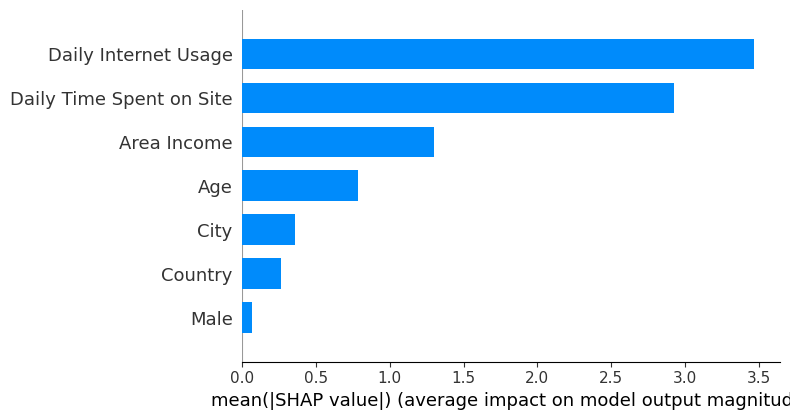

In [169]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

#**KerasClassifier**

In [ ]:
!pip install scikeras

In [171]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import backend as k
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [172]:
df

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,1.700304,-0.962695,1.424572,0
1,0.961132,-0.570425,1.002530,0.313805,1.492546,1.038750,0.451875,0
2,0.282083,-1.139826,0.356949,1.287589,-1.344415,-0.962695,0.981136,0
3,0.577432,-0.798185,-0.014456,1.501580,1.621499,1.038750,-0.177517,0
4,0.212664,-0.114905,1.408868,1.038731,1.141508,-0.962695,-0.277648,0
...,...,...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,-1.290685,1.038750,0.008440,1
996,-0.864601,1.023896,0.953329,-1.038735,0.006007,1.038750,-1.278953,1
997,-0.843775,1.707176,-0.938570,-1.358924,1.116434,1.038750,0.351744,1
998,-0.596389,-1.936986,-0.975484,0.181172,1.607171,-0.962695,-0.434996,0


**Dividindo os dados em target e features e aplicando a divisão de dados de treino e dados de teste.**

**Construino a rede...**

In [177]:
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    k.clear_session()
    rn = Sequential([
                #1ª camada oculta
               tf.keras.layers.Dense(units=4, activation = "relu", kernel_initializer = "random_uniform", input_dim=7), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
               #2ª camada oculta
               tf.keras.layers.Dense(units=4, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2), #Dropout = % de colunas zeradas para não dar overfitting! Recomendável entre 0.2 e 0.3
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'sigmoid')])
    

    rn.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['binary_accuracy'])


    return rn

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [178]:
rn = KerasClassifier(model=criarRede)
#============================================================================================
optimizers = ['adam']
init = ['uniform']
epochs = [1000]
batches = [20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)

#================================================================================
grid_search = GridSearchCV(estimator=rn,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv=10)

grid_search = grid_search.fit(X_train, y_train)

Epoch 1/1000


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


A saída de streaming foi truncada nas últimas 5000 linhas.
32/32 [==============================] - 0s 4ms/step - loss: 0.1696 - binary_accuracy: 0.9524
Epoch 503/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1701 - binary_accuracy: 0.9524
Epoch 504/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1948 - binary_accuracy: 0.9476
Epoch 505/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.1613 - binary_accuracy: 0.9492
Epoch 506/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1676 - binary_accuracy: 0.9508
Epoch 507/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1821 - binary_accuracy: 0.9429
Epoch 508/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1745 - binary_accuracy: 0.9540
Epoch 509/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1772 - binary_accuracy: 0.9429
Epoch 510/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1585 -

**Salvando o estimador...**

In [ ]:
import joblib

In [179]:
joblib.dump(model_xgbc, 'keras_modelo.pkl')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['keras_modelo.pkl']

In [ ]:
keras_modelo = joblib.load('keras_modelo.pkl')

In [ ]:
grid_search.best_params_

{'batch_size': 20,
 'epochs': 1000,
 'model__init': 'uniform',
 'optimizer': 'adam'}

**Score:**

In [180]:
print(f"O melhor score foi de {(grid_search.best_score_)*100:.2f}%")

O melhor score foi de 96.29%


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Métricas de avaliação de treino:
35/35 [==============================] - 0s 1ms/step


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


[[349   1]
 [ 12 338]]


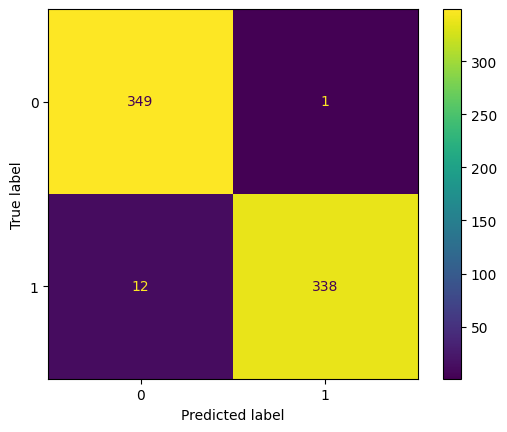

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       350
           1       1.00      0.97      0.98       350

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700


Métricas de avaliação de teste:
15/15 [==============================] - 0s 2ms/step
[[149   1]
 [  6 144]]


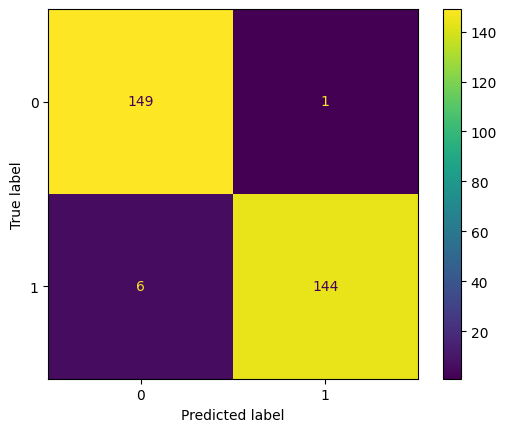

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       150
           1       0.99      0.96      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [181]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_search.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_search.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [182]:
tabela = pd.DataFrame()
tabela["y real"] = y_test
tabela["y preditivo"] = y_pred_test
tabela

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,y real,y preditivo
451,1,1
54,1,1
507,1,1
467,1,1
285,0,0
...,...,...
527,0,0
204,0,0
9,0,0
127,0,0


Salvando a tabela...

In [183]:
tabela.to_csv("11-tabelaComparativa_Keras.csv")

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


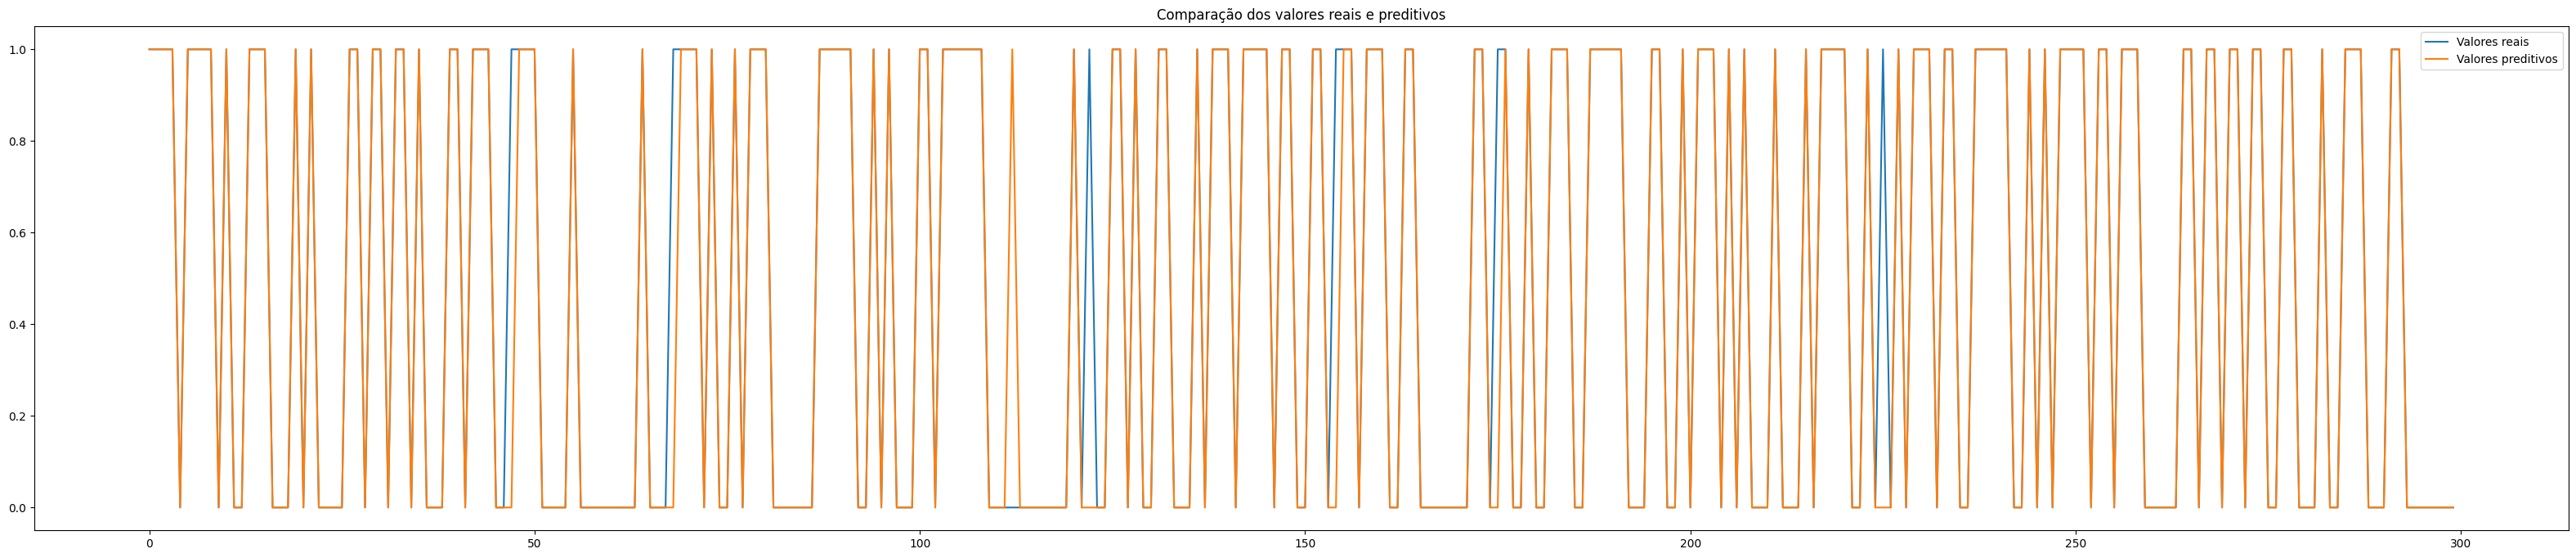

In [184]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores reais")
plt.plot(x_ax, y_pred_test, label="Valores preditivos")
plt.title("Comparação dos valores reais e preditivos")
plt.legend()
plt.show();